In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.18.0'

In [2]:
df = pd.read_csv('./dataset/KDD.txt')
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [3]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [5]:
cat_features = df.select_dtypes(include= 'object').columns
for i in cat_features:
    print(i, df[i].unique())

protocol_type ['udp' 'tcp' 'icmp']
service ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
flag ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
attack ['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
attacks = np.array(df['attack'].unique())
if 'normal' in attacks:
    ind_normal = np.where(attacks == 'normal')[0][0]
    attacks = np.delete(attacks, ind_normal)
df['attack'] = df['attack'].map(lambda x: 1 if x in attacks else 0)
df['attack'].unique()


array([0, 1])

In [8]:

from sklearn.preprocessing import LabelEncoder

protocol_type = df['protocol_type'].unique()
service = df['service'].unique()
flag = df['flag'].unique()

protocol_type_encoder = LabelEncoder()
service_encoder = LabelEncoder()
flag_encoder = LabelEncoder()

protocol_type_encoder.fit(protocol_type)
service_encoder.fit(service)
flag_encoder.fit(flag)

df['protocol_type'] = protocol_type_encoder.transform(df['protocol_type'])
df['service'] = service_encoder.transform(df['service'])
df['flag'] = flag_encoder.transform(df['flag'])
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,0,15
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,1,19
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,0,21
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,21
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,1,21


In [9]:
encoding = {'protocol_type': {}, 'service': {}, 'flag': {}}
encoding['protocol_type'] = {label: index for index, label in enumerate(protocol_type_encoder.classes_)}
encoding['service'] = {label: index for index, label in enumerate(service_encoder.classes_)}
encoding['flag'] = {label: index for index, label in enumerate(flag_encoder.classes_)}

encoding


{'protocol_type': {'icmp': 0, 'tcp': 1, 'udp': 2},
 'service': {'IRC': 0,
  'X11': 1,
  'Z39_50': 2,
  'aol': 3,
  'auth': 4,
  'bgp': 5,
  'courier': 6,
  'csnet_ns': 7,
  'ctf': 8,
  'daytime': 9,
  'discard': 10,
  'domain': 11,
  'domain_u': 12,
  'echo': 13,
  'eco_i': 14,
  'ecr_i': 15,
  'efs': 16,
  'exec': 17,
  'finger': 18,
  'ftp': 19,
  'ftp_data': 20,
  'gopher': 21,
  'harvest': 22,
  'hostnames': 23,
  'http': 24,
  'http_2784': 25,
  'http_443': 26,
  'http_8001': 27,
  'imap4': 28,
  'iso_tsap': 29,
  'klogin': 30,
  'kshell': 31,
  'ldap': 32,
  'link': 33,
  'login': 34,
  'mtp': 35,
  'name': 36,
  'netbios_dgm': 37,
  'netbios_ns': 38,
  'netbios_ssn': 39,
  'netstat': 40,
  'nnsp': 41,
  'nntp': 42,
  'ntp_u': 43,
  'other': 44,
  'pm_dump': 45,
  'pop_2': 46,
  'pop_3': 47,
  'printer': 48,
  'private': 49,
  'red_i': 50,
  'remote_job': 51,
  'rje': 52,
  'shell': 53,
  'smtp': 54,
  'sql_net': 55,
  'ssh': 56,
  'sunrpc': 57,
  'supdup': 58,
  'systat': 59,
  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  int64  
 2   service                      125972 non-null  int64  
 3   flag                         125972 non-null  int64  
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(["attack"] , axis =1)
y = df["attack"]
X_train,X_test_valid,y_train,y_test_valid = train_test_split(X,y,test_size = 0.4 ,random_state = 43)

In [12]:
X_validate,X_test,y_validate,y_test = train_test_split(X_test_valid,y_test_valid,test_size = 0.5 ,random_state = 43)
print(X_validate.shape, X_test.shape)

(25194, 42) (25195, 42)


In [13]:
print(X_train.shape, X_test.shape)

(75583, 42) (25195, 42)


In [14]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

mutual_info = mutual_info_classif(X_train , y_train)
Select_features = SelectKBest(mutual_info_classif, k =15)
Select_features.fit(X_train,y_train)

Select_features.get_support()

array([False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True, False, False, False])

In [15]:
selected_features = X_train.columns[Select_features.get_support()]
selected_features

Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in', 'count',
       'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate'],
      dtype='object')

In [16]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_validate = X_validate[selected_features]

In [17]:
print(X_train.shape, X_validate.shape , X_test.shape)

(75583, 15) (25194, 15) (25195, 15)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validate = scaler.transform(X_validate)


In [19]:
df_train = pd.DataFrame(X_train, columns = selected_features)
df_train['attack'] = y_train.values
df_train.head()

,service,flag,src_bytes,dst_bytes,logged_in,count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack
0,-0.440948,0.750730,-0.008318,-0.003567,1.237744,-0.725943,-0.638091,-0.632853,0.771481,-0.349757,1.254100,1.063280,-0.438065,-0.639746,-0.603047,0
1,-0.991041,0.750730,-0.008162,-0.005173,-0.807922,-0.717227,-0.638091,-0.632853,0.771481,-0.349757,-0.883899,1.063280,-0.438065,-0.639746,-0.625473,1
2,-0.440948,0.750730,-0.008325,-0.005018,1.237744,-0.586491,-0.638091,-0.632853,0.771481,-0.349757,1.254100,1.063280,-0.438065,-0.639746,-0.625473,0
3,-1.663375,-0.737098,-0.008366,-0.005173,-0.807922,1.156653,1.600373,1.602473,-1.321407,-0.017745,-0.892920,-1.007731,-0.068735,1.607675,1.617144,1
4,-0.440948,0.750730,-0.008315,-0.003999,1.237744,-0.699796,-0.638091,-0.632853,0.771481,-0.349757,1.254100,1.063280,-0.438065,-0.639746,-0.625473,0


In [20]:
window_size = 1
import numpy as np

def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size + 1):
        sequences.append(data[i:i + window_size])
    return np.array(sequences)

X_train_seq = create_sequences(X_train, window_size)
X_test_seq = create_sequences(X_test, window_size)
X_validate_seq = create_sequences(X_validate, window_size)

y_train_seq = y_train[window_size - 1:]
y_test_seq = y_test[window_size - 1:]
y_validate_seq = y_validate[window_size - 1:]
print(X_train_seq.shape)
print(X_test_seq.shape)
print(y_train_seq.shape)
print(y_test_seq.shape)
print(X_validate_seq.shape)
print(y_validate_seq.shape)

(75583, 1, 15)
(25195, 1, 15)
(75583,)
(25195,)
(25194, 1, 15)
(25194,)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Multiply, Lambda
from tensorflow.keras.optimizers import Adam

class LSTMWithAttention(tf.keras.Model):
    def __init__(self, input_shape, hidden_dim, output_dim):
        super(LSTMWithAttention, self).__init__()
        self.lstm = LSTM(hidden_dim, return_sequences=True)
        self.attention = Dense(1, activation='tanh')
        self.fc = Dense(output_dim, activation='sigmoid')
    
    def call(self, x):
        lstm_out = self.lstm(x)
        attn_weights = tf.nn.softmax(self.attention(lstm_out), axis=1)
        context = tf.reduce_sum(attn_weights * lstm_out, axis=1)
        out = self.fc(context)
        return out

input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
hidden_dim = 128
output_dim = 1

model_att = LSTMWithAttention(input_shape, hidden_dim, output_dim)
model_att.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model_att.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_validate_seq, y_validate_seq))

Epoch 1/10
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9235 - loss: 0.2081 - precision: 0.9567 - recall: 0.8745 - val_accuracy: 0.9505 - val_loss: 0.1365 - val_precision: 0.9695 - val_recall: 0.9231
Epoch 2/10
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9542 - loss: 0.1269 - precision: 0.9645 - recall: 0.9363 - val_accuracy: 0.9619 - val_loss: 0.1158 - val_precision: 0.9775 - val_recall: 0.9401
Epoch 3/10
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9611 - loss: 0.1128 - precision: 0.9743 - recall: 0.9409 - val_accuracy: 0.9631 - val_loss: 0.1054 - val_precision: 0.9743 - val_recall: 0.9460
Epoch 4/10
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9644 - loss: 0.1013 - precision: 0.9751 - recall: 0.9473 - val_accuracy: 0.9646 - val_loss: 0.0993 - val_precision: 0.9768 - val_recall: 0.9467
Epoch 5/10
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9650 - loss: 0.0965 - precision: 0.9749 - recall: 0.9492 - val_accuracy: 0.9663

In [22]:
model_att.save('./models/model_v1.h5')

In [ ]:
results_att = model_att.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {results_att[0]:.4f} \n, Test Accuracy: {results_att[1]:.4f} \n, Test Precision: {results_att[2]:.4f} \n, Test Recall: {results_att[3]:.4f} \n")

precision = results_att[2]
recall = results_att[3]
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", f1_score)

788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9702 - loss: 0.0791 - precision: 0.9823 - recall: 0.9535
Test Loss: 0.0792 
, Test Accuracy: 0.9691 
, Test Precision: 0.9819 
, Test Recall: 0.9509 

F1-score: 0.9661436710682362


In [24]:
class SimpleLSTM(tf.keras.Model):
    def __init__(self, input_shape, hidden_dim, output_dim):
        super(SimpleLSTM, self).__init__()
        self.lstm = LSTM(hidden_dim)
        self.fc = Dense(output_dim, activation='sigmoid')
    
    def call(self, x):
        lstm_out = self.lstm(x)
        out = self.fc(lstm_out)
        return out

input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
hidden_dim = 64
output_dim = 1
model = SimpleLSTM(input_shape, hidden_dim, output_dim)
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_validate_seq, y_validate_seq))
model.save('./models/model_v2.h5')

Epoch 1/10
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9170 - loss: 0.2206 - precision_1: 0.9543 - recall_1: 0.8631 - val_accuracy: 0.9490 - val_loss: 0.1381 - val_precision_1: 0.9649 - val_recall_1: 0.9245
Epoch 2/10
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9536 - loss: 0.1304 - precision_1: 0.9653 - recall_1: 0.9337 - val_accuracy: 0.9584 - val_loss: 0.1199 - val_precision_1: 0.9673 - val_recall_1: 0.9428
Epoch 3/10
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9611 - loss: 0.1139 - precision_1: 0.9739 - recall_1: 0.9415 - val_accuracy: 0.9618 - val_loss: 0.1090 - val_precision_1: 0.9720 - val_recall_1: 0.9454
Epoch 4/10
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9651 - loss: 0.1020 - precision_1: 0.9773 - recall_1: 0.9467 - val_accuracy: 0.9636 - val_loss: 0.1028 - val_precision_1: 0.9710 - val_recall_1: 0.9503
Epoch 5/10
2362/2362 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9656 - loss: 0.0964 - precision_1: 0.9761 - rec

In [25]:
results = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {results[0]:.4f} \n, Test Accuracy: {results[1]:.4f} \n, Test Precision: {results[2]:.4f} \n, Test Recall: {results[3]:.4f} \n")

precision = results[2]
recall = results[3]
f1_score = 2 * (precision * recall) / (precision + recall)
print("F1-score:", f1_score)

788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9727 - loss: 0.0801 - precision_1: 0.9808 - recall_1: 0.9604
Test Loss: 0.0794 
, Test Accuracy: 0.9722 
, Test Precision: 0.9801 
, Test Recall: 0.9595 

F1-score: 0.9696969659348279


Test Loss, Test Accuracy, Test Precision, Test Recall: [0.07917331904172897, 0.9690811634063721, 0.9818904399871826, 0.9508939981460571]
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
F1-score: 0.9661436829066887


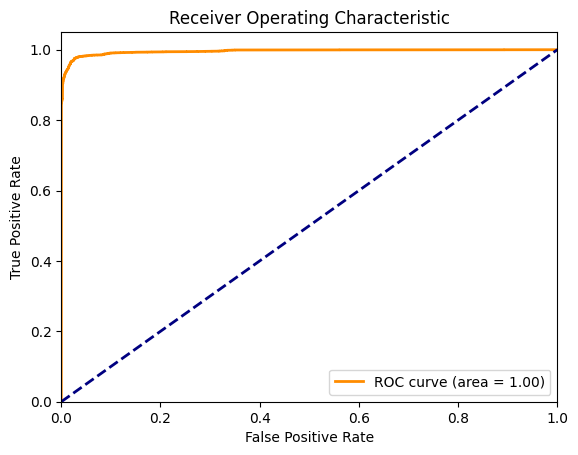

In [26]:

from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, f1_score
import seaborn as sns

print("Test Loss, Test Accuracy, Test Precision, Test Recall:", results_att)

y_pred_prob = model_att.predict(X_test_seq).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

precision = results_att[2]
recall = results_att[3]
f1 = f1_score(y_test_seq, y_pred)
print("F1-score:", f1)

fpr, tpr, _ = roc_curve(y_test_seq, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



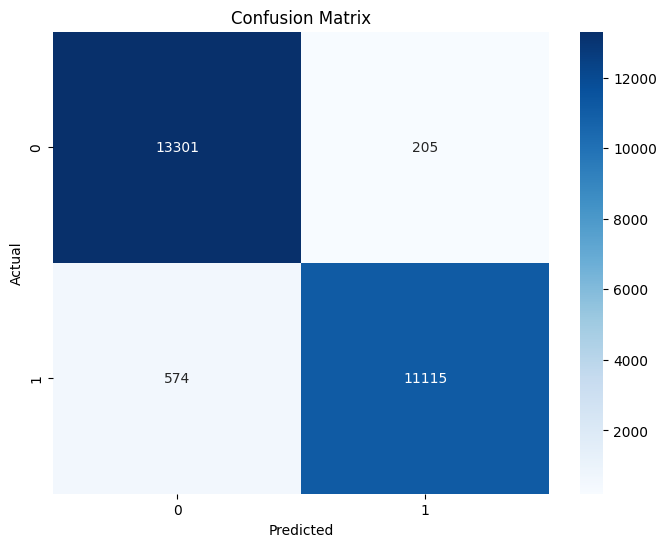

In [27]:
cm = confusion_matrix(y_test_seq, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


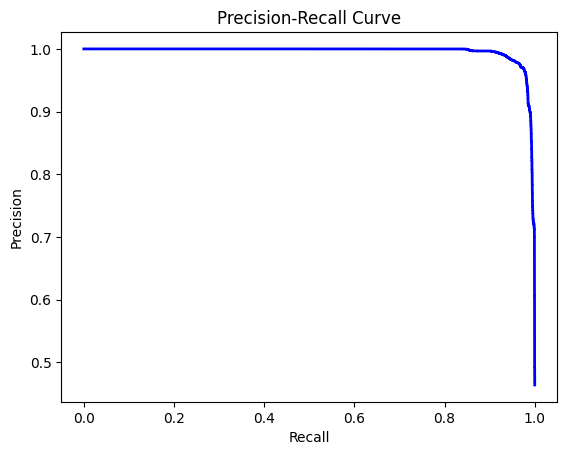

In [28]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test_seq, y_pred_prob)
plt.figure()
plt.plot(recall_vals, precision_vals, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

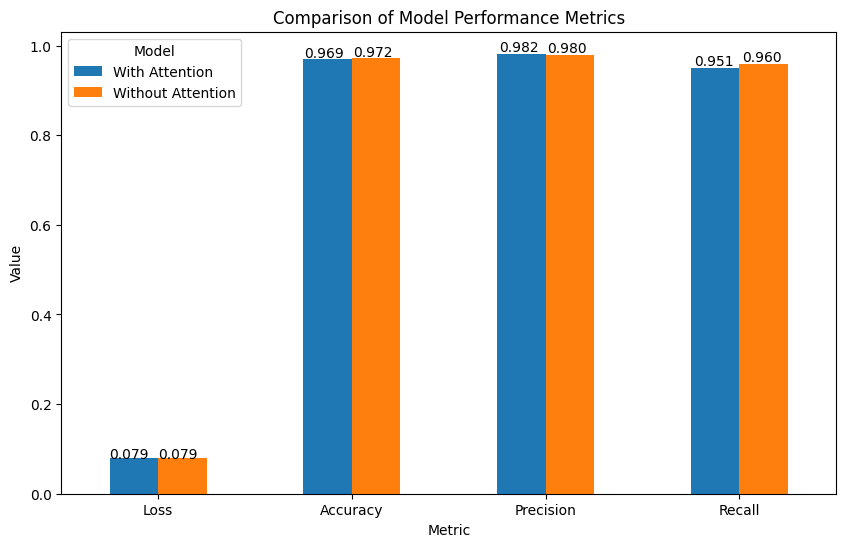

In [29]:
metrics = ['Loss', 'Accuracy', 'Precision', 'Recall']
results_att_values = results_att[:4]
results_values = results[:4]

comparison_df = pd.DataFrame({
    'Metric': metrics,
    'With Attention': results_att_values,
    'Without Attention': results_values
})

ax = comparison_df.plot(x='Metric', kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.legend(title='Model')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()
